In [ ]:
# NON STANDARD PYPCD!!!!!!!!!!

# pip install setuptools
# cd ~
# git clone https://github.com/rubenvanparys/pypcd
# cd pypcd
# python setup.py install



In [ ]:
install numpy
# is installed

In [1]:
from pypcd import pypcd 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tarfile
import yaml


In [20]:
TREE_ID = 1760
PLOT_ID = 'AM3_iron_ranges_boundary_lower'



In [21]:
tarpath = PLOT_ID+'.qsm.'+str(TREE_ID).zfill(4)+'.tar'

In [22]:
tar = tarfile.open(tarpath, "r:")

In [23]:
for member in tar:
    # print(member.name)
    #get opt model

    #read opt.yaml
    if member.name == 'opt.yaml':
        f = tar.extractfile(member)
        opt = yaml.safe_load(f)
        f.close()
        optmodel = opt['opt']
        print('optimal model : ',optmodel)
        break
#read opt model from tar
branchdatapcd = tar.extractfile(optmodel+'/branchdata.pcd')
cylinderfilespcd = tar.extractfile(optmodel+'/CylinderFiles.pcd')


branchdata = pypcd.PointCloud.from_fileobj(branchdatapcd)
cylinderdata = pypcd.PointCloud.from_fileobj(cylinderfilespcd)
#dataframe
bdf = pd.DataFrame(branchdata.pc_data)
cdf = pd.DataFrame(cylinderdata.pc_data)



optimal model :  model_0_0


In [24]:
#get all cyls from cdf where branch == 0
cyls = cdf[cdf['branch'] == 0]
display(cyls)


,length,radius,unmodradius,surfacecoverage,parent,extension,branch,added,numlayers,meanpointdist,mad,x,y,z,dx,dy,dz
0,0.536153,0.316804,0.316804,0.6375,4294967295,1,0,0,3,0.019851,3.804593e-04,-67.268387,-56.626205,110.424934,0.138822,-0.105519,0.984680
1,0.383841,0.296851,0.296851,0.8600,0,2,0,0,4,0.014122,-1.212287e-03,-67.231461,-56.663925,110.960182,0.160164,-0.090756,0.982909
2,0.293150,0.293696,0.293696,0.8425,1,3,0,0,3,0.014063,-7.485335e-04,-67.158035,-56.674557,111.337753,0.229259,-0.029682,0.972913
3,0.273099,0.300455,0.300455,0.8625,2,4,0,0,3,0.020685,-8.247467e-04,-67.111824,-56.672935,111.628227,0.305289,-0.067089,0.949893
4,0.367011,0.274608,0.274608,0.8175,3,5,0,0,3,0.040721,-2.947648e-03,-66.956810,-56.713787,111.863029,-0.498224,0.097267,0.861576
5,0.609523,0.262923,0.254432,0.4575,4,6,0,0,3,0.031779,-1.999787e-03,-67.253708,-56.678349,111.970474,0.774539,-0.155430,0.613132
6,0.253160,0.251237,0.251237,0.8475,5,7,0,0,3,0.016929,-7.553977e-04,-66.829651,-56.773331,112.404816,0.417573,-0.104167,0.902653
7,0.284278,0.249876,0.257757,0.6925,6,8,0,0,3,0.023378,-2.052659e-03,-66.746849,-56.806252,112.643173,0.298893,-0.093355,0.949709
8,0.363974,0.248514,0.248514,0.8425,7,9,0,0,4,0.018557,-7.562539e-04,-66.642166,-56.816086,112.908592,-0.073574,-0.246275,0.966403
9,0.351022,0.231956,0.231956,0.7350,8,10,0,0,4,0.009210,-1.627798e-04,-66.649734,-56.896339,113.264191,0.140733,-0.150057,0.978610


<Figure size 640x480 with 0 Axes>

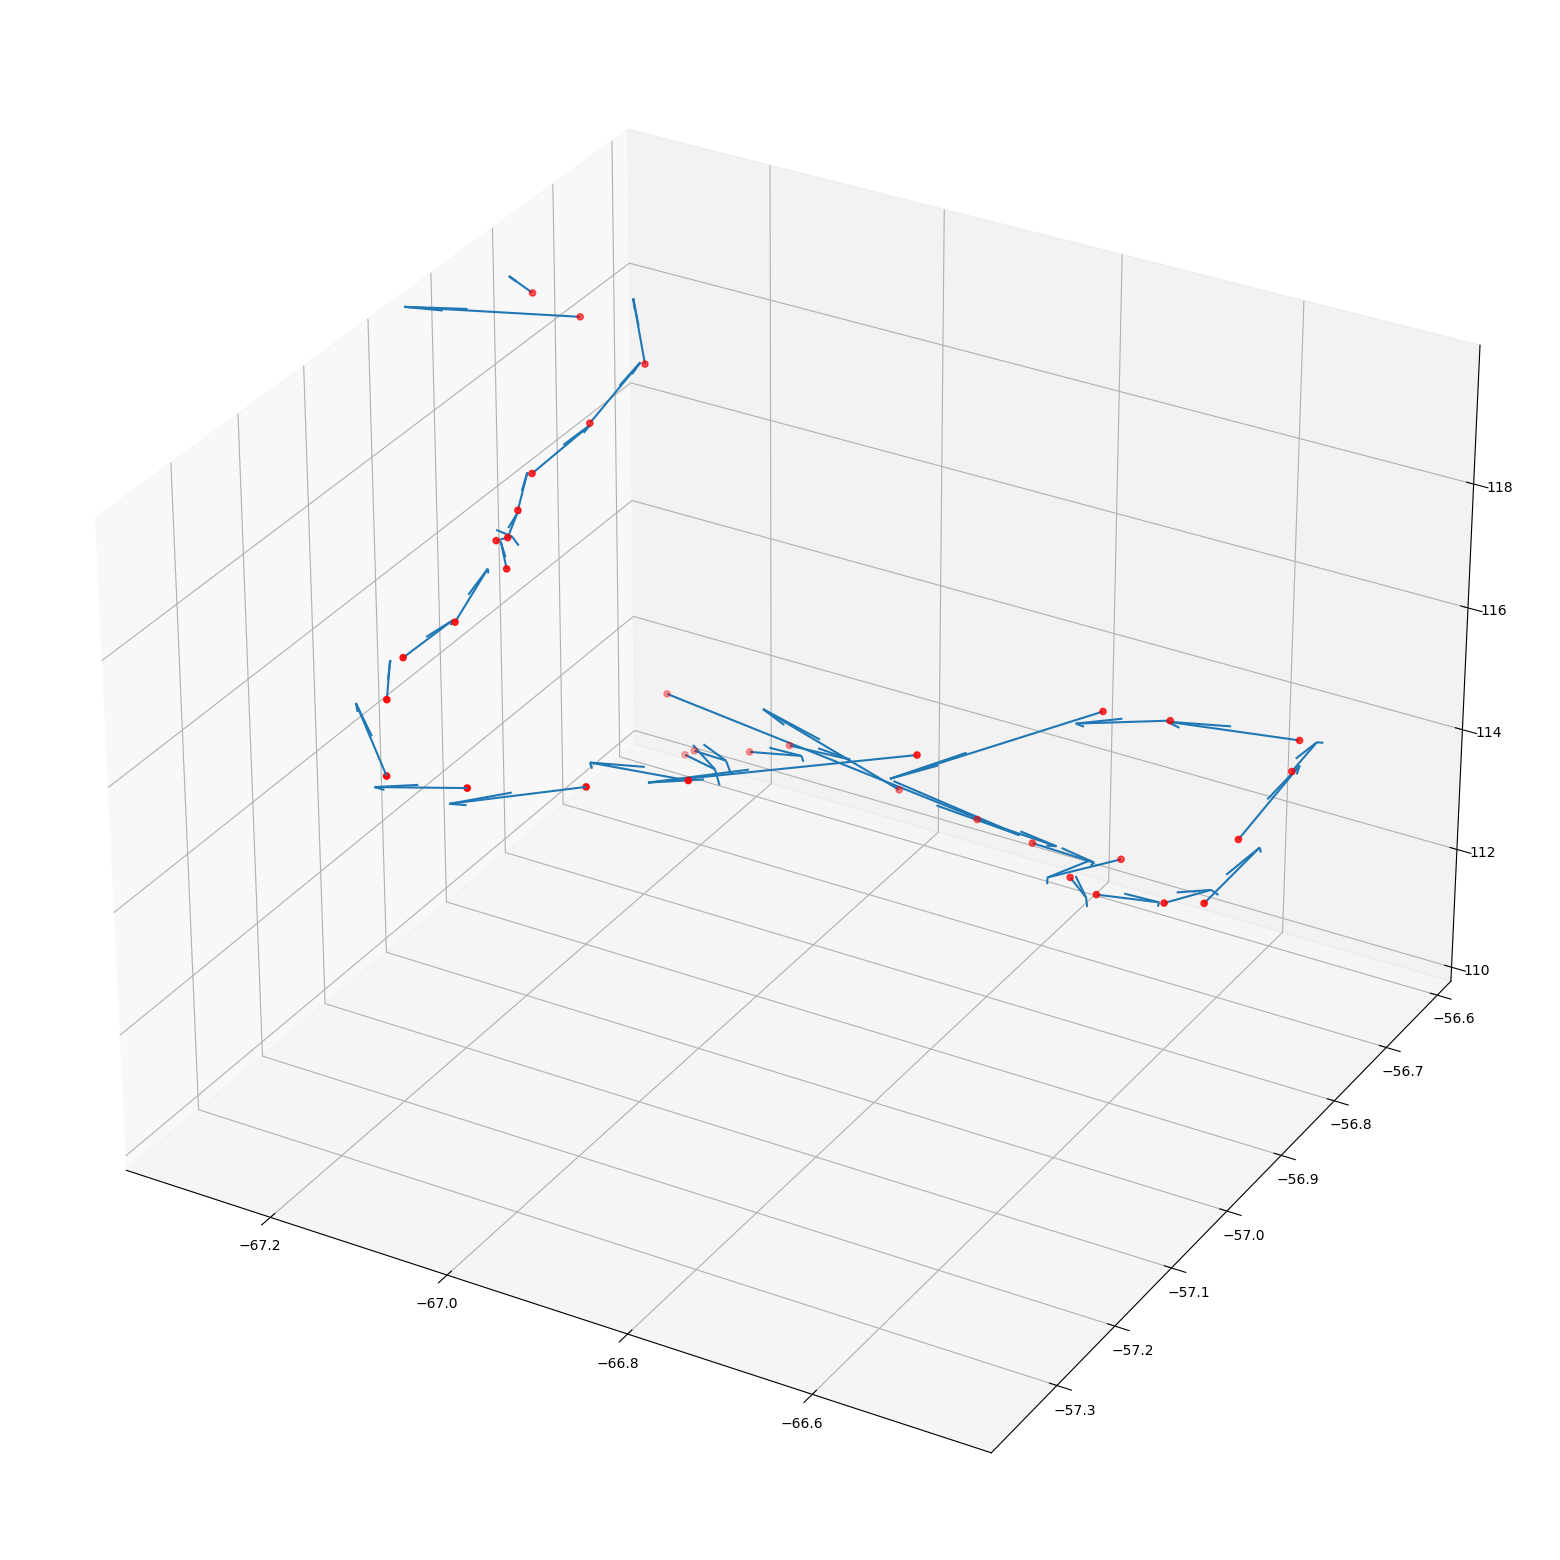

In [25]:

#plot cyls
fig = plt.figure()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cyls['x'], cyls['y'], cyls['z'], c='r', marker='o')
#equal aspect ratio
ax.set_aspect('auto')
#plot dx,dy,dz times length as arrows
for i in range(len(cyls)):
    unit_vector = np.array([cyls['dx'].iloc[i], cyls['dy'].iloc[i], cyls['dz'].iloc[i]])
    vector = unit_vector * cyls['length'].iloc[i]
    origin = np.array([cyls['x'].iloc[i], cyls['y'].iloc[i], cyls['z'].iloc[i]])
    # ax.quiver(origin[0], origin[1], origin[2], unit_vector[0], unit_vector[1], unit_vector[2], length=cyls['length'].iloc[i])
    ax.quiver(origin[0], origin[1], origin[2], vector[0], vector[1], vector[2])


In [26]:
#get z coordinate of base

# zbase = cyls['z'].min()
zbase = cdf.iloc[0]['z']
offset_from_base = 1.0
cuttoff =  zbase+offset_from_base

# find lowest branch with length > 1m

#find all branches
#get unique branch ids
# for each branch
branchheights = pd.DataFrame(columns=['branch','height'])

minlen = 3.0
minheight = 2.0

branchids = cdf['branch'].unique()
for branchid in branchids:
    branch = cdf[cdf['branch'] == branchid]
    # get sum of lengths
    length = branch['length'].sum()
    baseheight = branch.iloc[0]['z']

    if branchid == 0:
        continue
    if length < 1.0:
        continue

    if baseheight < minheight+zbase:
        continue

    branchheights = pd.concat([branchheights, pd.DataFrame({'branch':[branchid], 'height':[baseheight]})])




#get elevation of fork
# height of lowest branch thats not 0
branchheights = branchheights[branchheights['branch'] != 0]
zfork = branchheights['height'].min()
print('zfork : ',zfork)
# heigth from fork
dist = -0.5
cuttoff = zfork+dist





zfork :  112.48518371582031


In [27]:

trunk = cdf[cdf['branch'] == 0]
trunk = trunk[trunk['z'] > cuttoff]
#get parent cyl of iloc 0
parent = int(trunk.iloc[0]['parent'])
# add parent row to top of trunk
trunk = pd.concat([cdf[cdf.index == parent],trunk])


bottomcyl = trunk.iloc[0]

base = np.array([bottomcyl['x'],bottomcyl['y'],bottomcyl['z']])
unit_vector = np.array([bottomcyl['dx'],bottomcyl['dy'],bottomcyl['dz']])
vector = unit_vector * bottomcyl['length']
end = base + vector
#find intersection of vector with plane
planez = cuttoff
dist_along_axis_from_base = (planez - base[2]) / unit_vector[2]

newbase = base + dist_along_axis_from_base * unit_vector
newlength = np.linalg.norm(end - newbase)

bottomcyl_new = bottomcyl.copy()
bottomcyl_new['x'] = newbase[0]
bottomcyl_new['y'] = newbase[1]
bottomcyl_new['z'] = newbase[2]
bottomcyl_new['length'] = newlength


#insert new bottom cyl
trunk.iloc[0] = bottomcyl_new
cdf_new = cdf.copy()
#merge trunk back into cdf_new

cdf_new[cdf_new['branch'] == 0] = trunk
#cut off cyls below cuttoff
# cdf_new = cdf_new[cdf_new['z'] >= cuttoff -0.001]


In [28]:

#calc total volume
def cyl_volume(cyl):
    r = cyl['radius']
    h = cyl['length']
    return np.pi * r**2 * h

def total_volume(cyls):
    total_volume = 0
    #dropnan
    cyls = cyls.dropna()
    
    for i in range(len(cyls)):
        total_volume += cyl_volume(cyls.iloc[i])
    return total_volume * 1000 #m3 to l

    

print(total_volume(cdf))
print(total_volume(cdf_new))
print(total_volume(cdf_new) - total_volume(cdf))

densisty = 1.1136 #kg/l
print('weight change : ',(total_volume(cdf_new) - total_volume(cdf)) * densisty, 'kg')




2909.3291784323856
2384.9664675007057
-524.3627109316799
weight change :  -583.9303148935187 kg


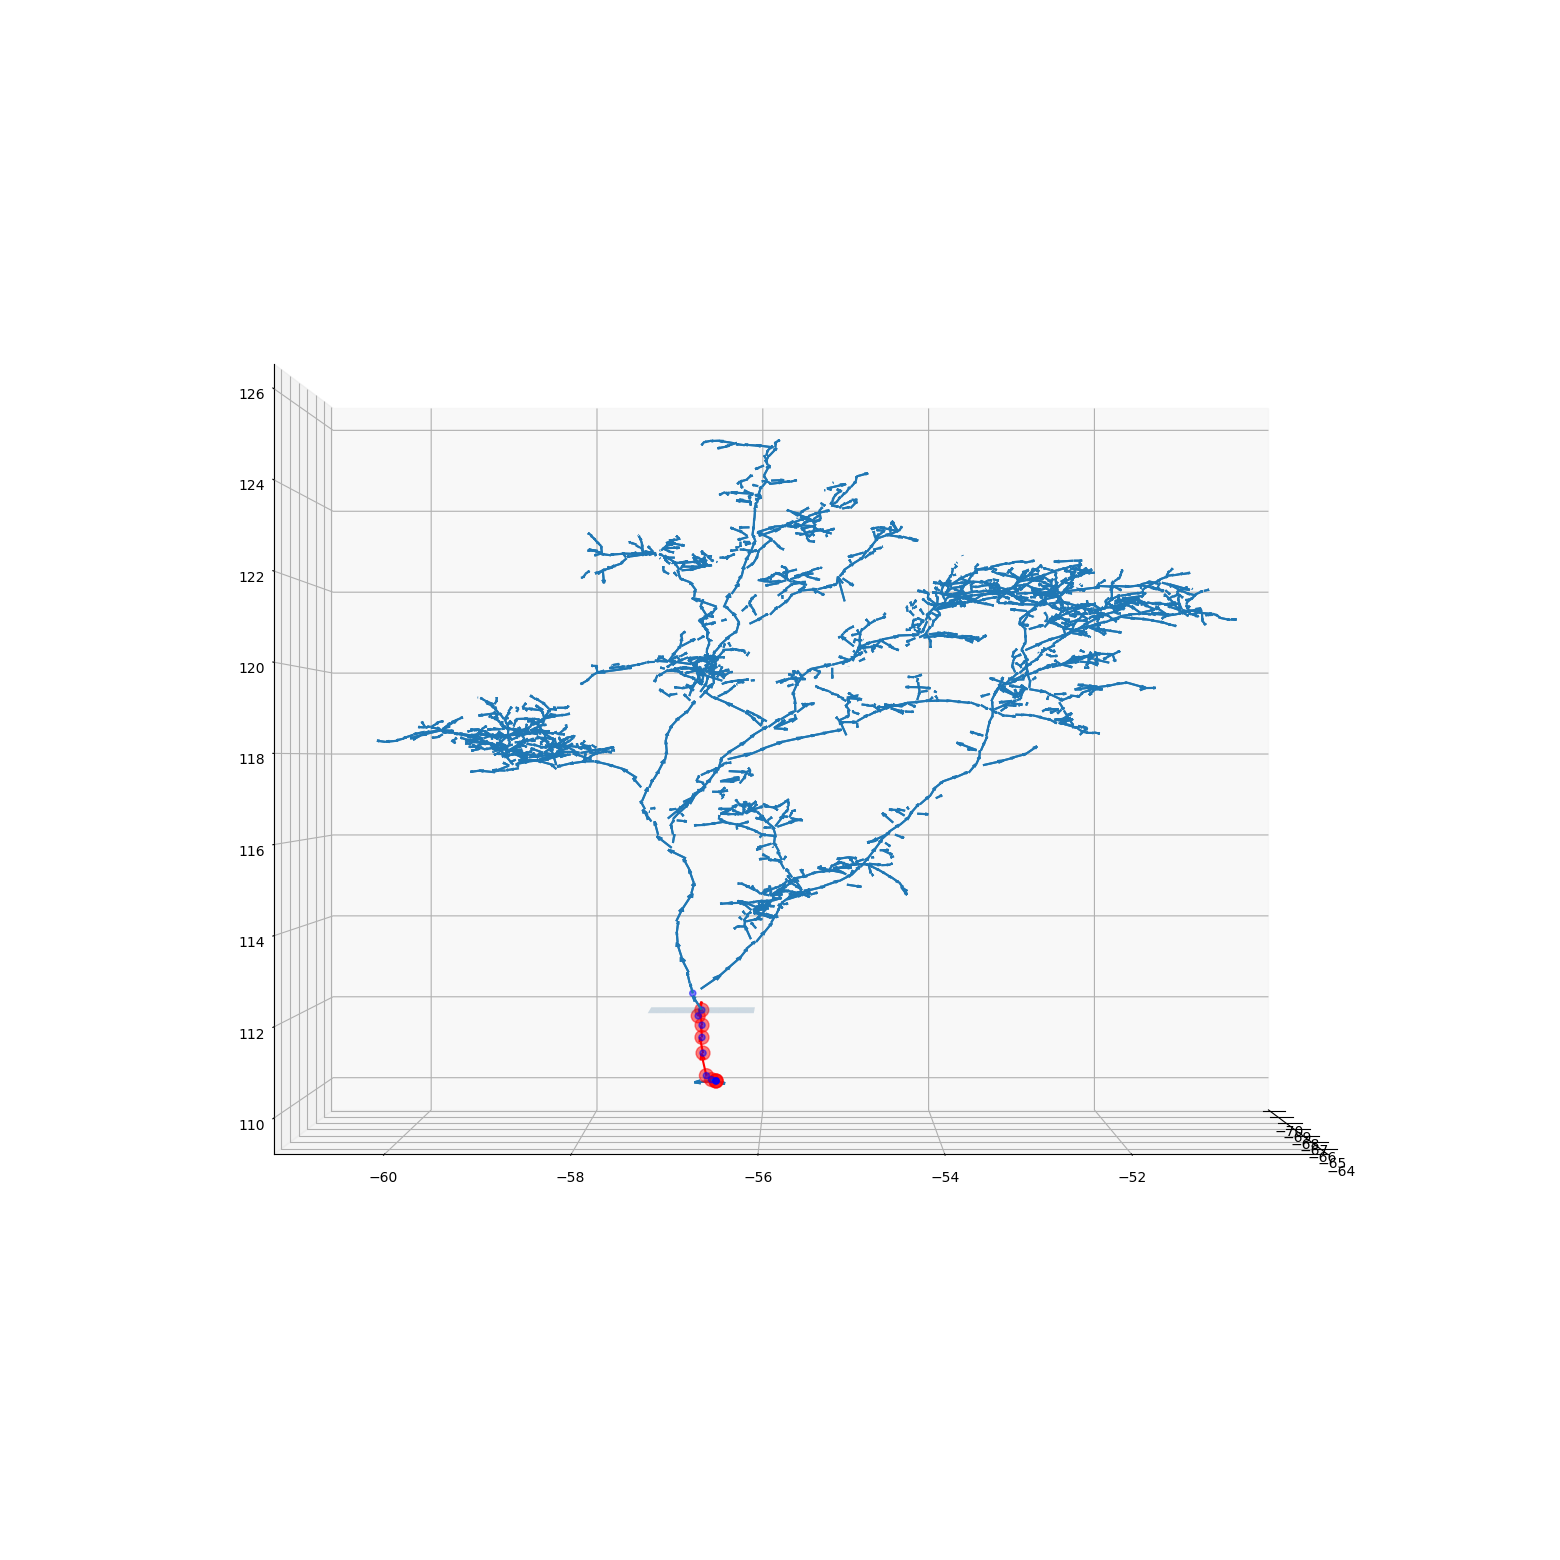

In [29]:
#zoom in cut off section
buffer = 0.5
bottom_original = cdf[cdf['z'] < cuttoff + buffer]
bottom_cut = cdf[cdf['z'] < cuttoff]

#plot cyls
# set figure size
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
#equal aspect ratio
# ax.set_aspect('equal')


#draw surface plane at zbase with width of 1m
planessize = 1.0
planeminx = bottom_original['x'].min()-planessize/2
planemaxx = bottom_original['x'].max()+planessize/2
planeminy = bottom_original['y'].min()-planessize/2
planemaxy = bottom_original['y'].max()+planessize/2
planez = cuttoff
X, Y = np.meshgrid(np.arange(planeminx, planemaxx, 0.1), np.arange(planeminy, planemaxy, 0.1))
Z = np.ones(X.shape) * planez
#make plane
ax.plot_surface(X, Y, Z, alpha=0.2)
ax.set_aspect('auto')

#plot cdf in blue
ax.scatter(bottom_cut['x'], bottom_cut['y'], bottom_cut['z'], c='r', marker='o',alpha=0.5,s=100)

ax.scatter(bottom_original['x'], bottom_original['y'], bottom_original['z'], c='b', marker='o',alpha=0.5)
# veiw from front
ax.view_init(0, 0)
#plot points as cylinders




cyls = cdf_new
for i in range(len(cyls)):
    unit_vector = np.array([cyls['dx'].iloc[i], cyls['dy'].iloc[i], cyls['dz'].iloc[i]])
    vector = unit_vector * cyls['length'].iloc[i]
    origin = np.array([cyls['x'].iloc[i], cyls['y'].iloc[i], cyls['z'].iloc[i]])
    ax.quiver(origin[0], origin[1], origin[2], vector[0], vector[1], vector[2])


cyls = cdf_new
for i in range(len(cyls)):
    unit_vector = np.array([cyls['dx'].iloc[i], cyls['dy'].iloc[i], cyls['dz'].iloc[i]])
    vector = unit_vector * cyls['length'].iloc[i]
    origin = np.array([cyls['x'].iloc[i], cyls['y'].iloc[i], cyls['z'].iloc[i]])
    ax.quiver(origin[0], origin[1], origin[2], vector[0], vector[1], vector[2])



missingrows = cdf.copy()
missingrows = missingrows.drop(cdf_new.dropna().index)


cyls = missingrows
for i in range(len(cyls)):
    unit_vector = np.array([cyls['dx'].iloc[i], cyls['dy'].iloc[i], cyls['dz'].iloc[i]])
    vector = unit_vector * cyls['length'].iloc[i]
    origin = np.array([cyls['x'].iloc[i], cyls['y'].iloc[i], cyls['z'].iloc[i]])
    ax.quiver(origin[0], origin[1], origin[2], vector[0], vector[1], vector[2],color='r')



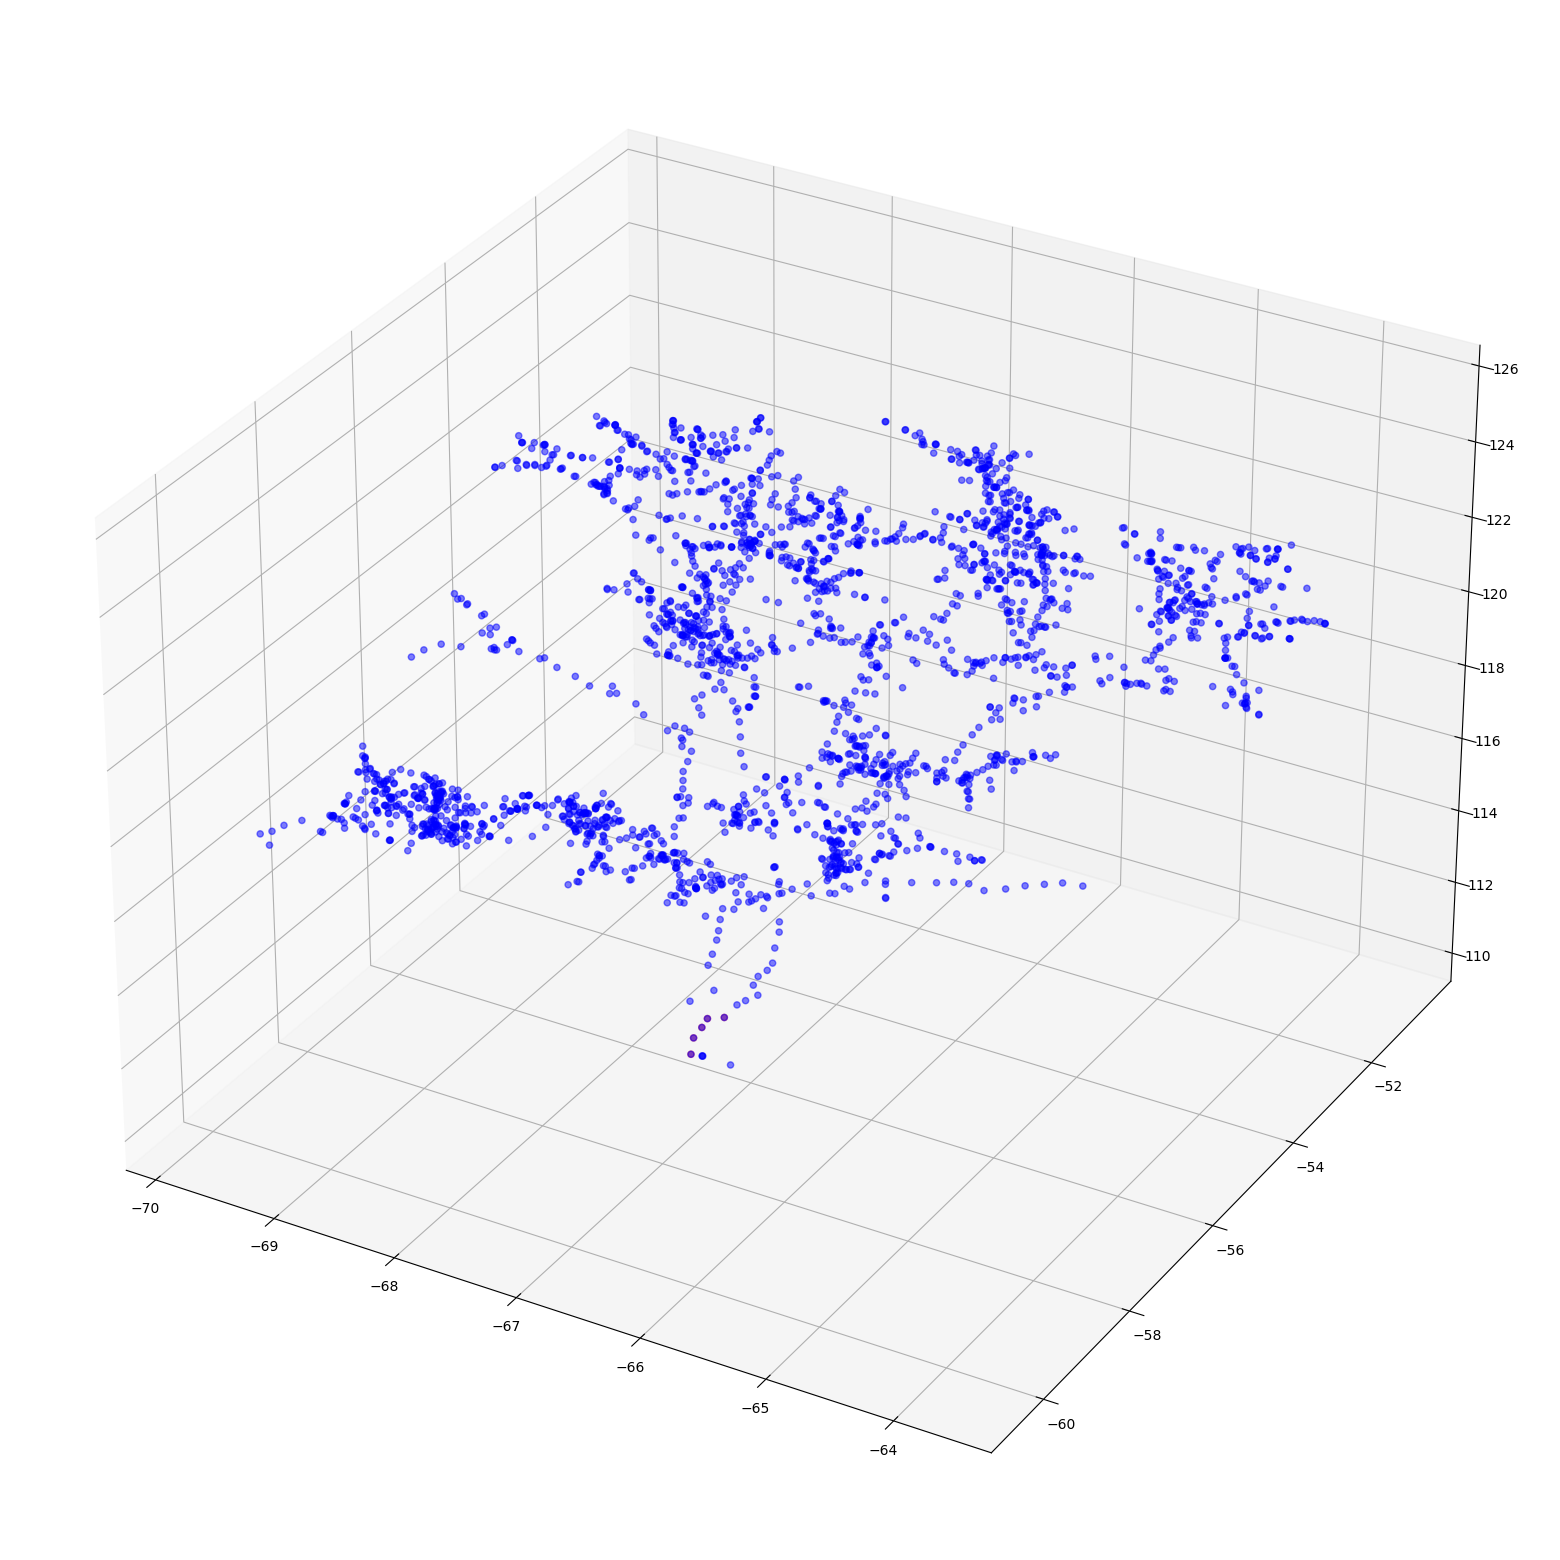

In [30]:

#plot cyls
# set figure size
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cyls['x'], cyls['y'], cyls['z'], c='r', marker='o',alpha=0.5)
#equal aspect ratio
ax.set_aspect('auto')

#plot cdf in blue
ax.scatter(cdf['x'], cdf['y'], cdf['z'], c='b', marker='o',alpha=0.5)


In [3]:
pwd

'/home/jed/Desktop/Arbor_Meta/FireBreak_new/Cutting_cylinder_models'